In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.offsetbox import AnchoredText

In [2]:
trainFile =  pd.read_csv('traindata.tsv',sep='\t')
valFile =  pd.read_csv('validationdata.tsv', sep='\t')
# testFile = pd.read_csv('testE100B10Im512lr0.005.csv')

In [3]:
valFile.columns

Index(['Epoch', 'BatchTime', 'AverageBatchTime', 'Loss', 'AverageLoss',
       'Accuracy', 'AverageAccuracy'],
      dtype='object')

In [4]:
trainFile

,Epoch,BatchTime,AverageBatchTime,Loss,AverageLoss,Accuracy,AverageAccuracy
[1][0/1776],1.814770,1.814770,1.170575,1.170575,1.0,1.000000,NaN
[1][1/1776],2.683786,2.249278,2.507854,1.839215,0.0,0.500000,NaN
[1][2/1776],4.774807,3.091121,0.751158,1.476529,1.0,0.666667,NaN
[1][3/1776],2.079730,2.838273,2.472134,1.725430,0.0,0.500000,NaN
[1][4/1776],0.805862,2.431791,0.821460,1.544636,1.0,0.600000,NaN
[1][5/1776],2.376518,2.422579,2.479116,1.700383,0.0,0.500000,NaN
[1][6/1776],2.540130,2.439372,2.142726,1.763575,0.0,0.428571,NaN
[1][7/1776],0.824317,2.237490,1.611556,1.744573,0.0,0.375000,NaN
[1][8/1776],1.012176,2.101344,1.349596,1.700686,0.0,0.333333,NaN
[1][9/1776],0.755569,1.966767,0.991303,1.629748,1.0,0.400000,NaN


In [5]:
len(trainFile.Accuracy)

111223

In [6]:
iterations =np.arange(1,len(trainFile.Accuracy)+1,1)

In [7]:
iterations

array([     1,      2,      3, ..., 111221, 111222, 111223])

In [8]:
def plot(x,y,label,ylabel,filename,title,color='b',xlabel='iterations',save=False):
    plt.rcParams['figure.figsize']=[10,8]
    plt.plot(x,y,label=label,color=color)
    # plt.plot(valFile.index,valFile.AverageAccuracy,label='Validation Loss')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title)
    legend = plt.legend(loc='lower right',frameon=False)
    legend.get_frame().set_facecolor('white')
    legend.get_frame().set_edgecolor('b')
    
    if(save):
        plt.savefig('{}.png'.format(filename),bbox_inches = 'tight')
    plt.show()

# Training Loss

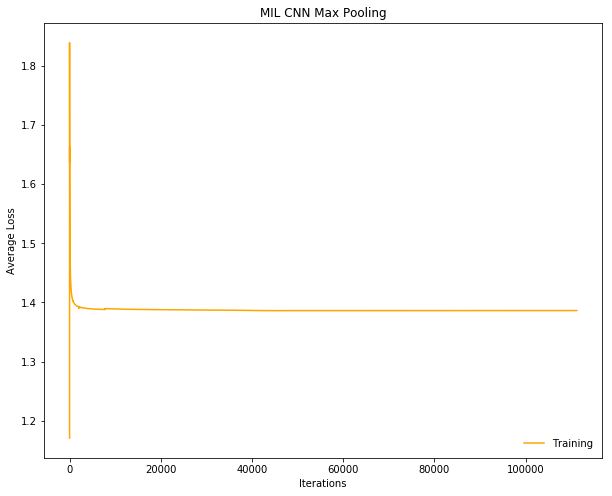

In [10]:
plot(iterations,trainFile.Loss,
     label='Training',title='MIL CNN Max Pooling',
     xlabel='Iterations',ylabel='Average Loss',
     color='orange',filename='miltrainingloss',save='True')

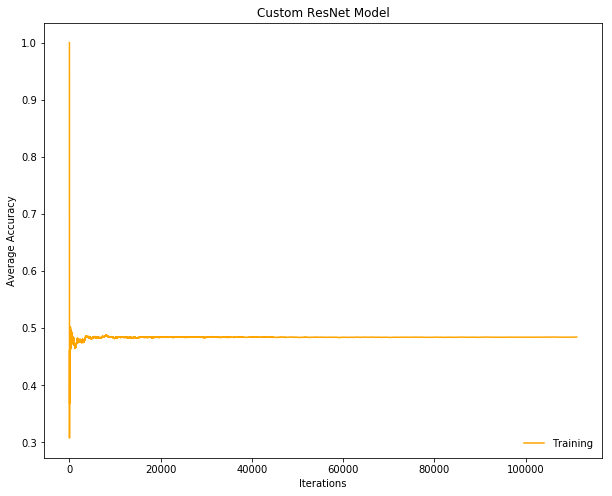

In [11]:
plot(iterations,trainFile.Accuracy,
     label='Training',title='Custom ResNet Model',
     xlabel='Iterations',ylabel='Average Accuracy',
     color='orange',filename='trainingLoss',save=True)

# Validation 

In [14]:
iterations =np.arange(1,len(valFile.Accuracy)+1,1)

In [15]:
valFile

,Epoch,BatchTime,AverageBatchTime,Loss,AverageLoss,Accuracy,AverageAccuracy
0,[0/445],1.247136,1.247136,1.386049,1.386049,1.0,1.000000
1,[1/445],1.758147,1.502642,1.385703,1.385876,1.0,1.000000
2,[2/445],2.333638,1.779640,1.392483,1.388078,1.0,1.000000
3,[3/445],4.781847,2.530192,1.386357,1.387648,0.0,0.750000
4,[4/445],3.105529,2.645259,1.386885,1.387495,0.0,0.600000
5,[5/445],1.725939,2.492039,1.385640,1.387186,1.0,0.666667
6,[6/445],2.947939,2.557168,1.386065,1.387026,1.0,0.714286
7,[7/445],4.591592,2.811471,1.386785,1.386996,0.0,0.625000
8,[8/445],4.535748,3.003057,1.385822,1.386865,1.0,0.666667
9,[9/445],4.186149,3.121367,1.385655,1.386744,1.0,0.700000


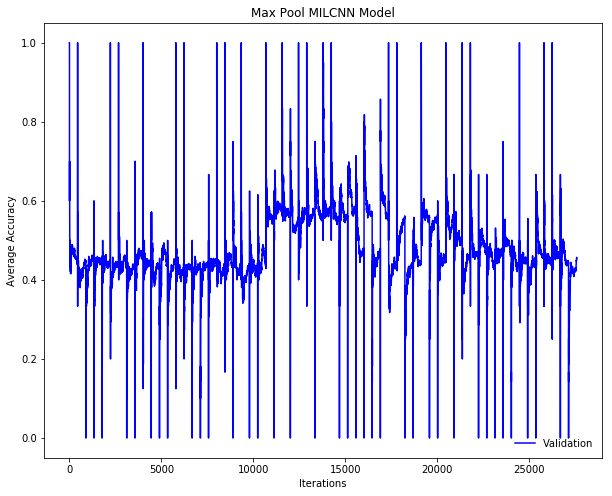

In [17]:
plot(iterations,valFile.AverageAccuracy,
     label='Validation',title='Max Pool MILCNN Model',
     xlabel='Iterations',ylabel='Average Accuracy',
     color='blue',filename='MILCNN',save=True)

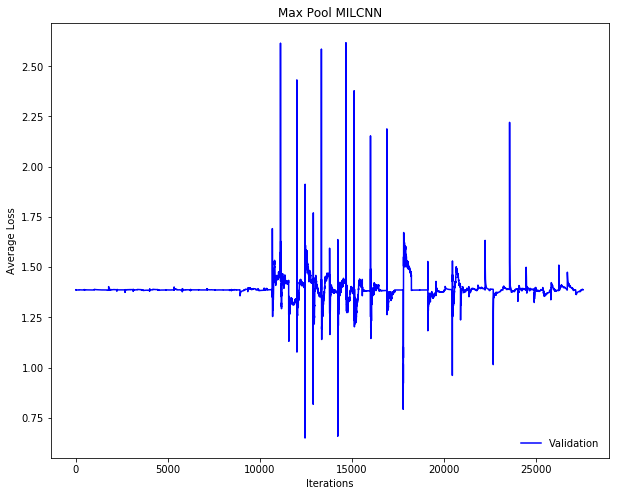

In [20]:
plot(iterations,valFile.AverageLoss,
     label='Validation',title='Max Pool MILCNN',
     xlabel='Iterations',ylabel='Average Loss',
     color='blue',filename='resnetValloss',save=True)

In [ ]:
plot(testFile.index,testFile.Accuracy,
     label='Validation',title='Custom ResNet Model',
     xlabel='Iterations',ylabel='Average Accuracy',
     color='blue',filename='resnetValavgacc')

In [ ]:
def average(arr):
    array = np.array(arr)
    return np.sum(arr)/len(arr)

In [ ]:
average(valFile.Accuracy)

In [ ]:
average(trainFile.Accuracy)

In [ ]:
average(testFile.Accuracy)